Country Coordinates:
         Country  Latitude  Longitude
0         Canada   56.1304  -106.3468
1  United States   37.0902   -95.7129
2         Brazil  -14.2350   -51.9253
3      Argentina  -38.4161   -63.6167
4         Russia   61.5240   105.3188
5          China   35.8617   104.1954
6          India   20.5937    78.9629
7      Australia  -25.2744   133.7751
8   South Africa  -30.5595    22.9375
9          Egypt   26.8206    30.8025

Clustered Countries:
         Country  Latitude  Longitude  Cluster
0         Canada   56.1304  -106.3468        1
1  United States   37.0902   -95.7129        1
2         Brazil  -14.2350   -51.9253        1
3      Argentina  -38.4161   -63.6167        1
4         Russia   61.5240   105.3188        0
5          China   35.8617   104.1954        0
6          India   20.5937    78.9629        0
7      Australia  -25.2744   133.7751        0
8   South Africa  -30.5595    22.9375        2
9          Egypt   26.8206    30.8025        2


c:\Users\haric\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


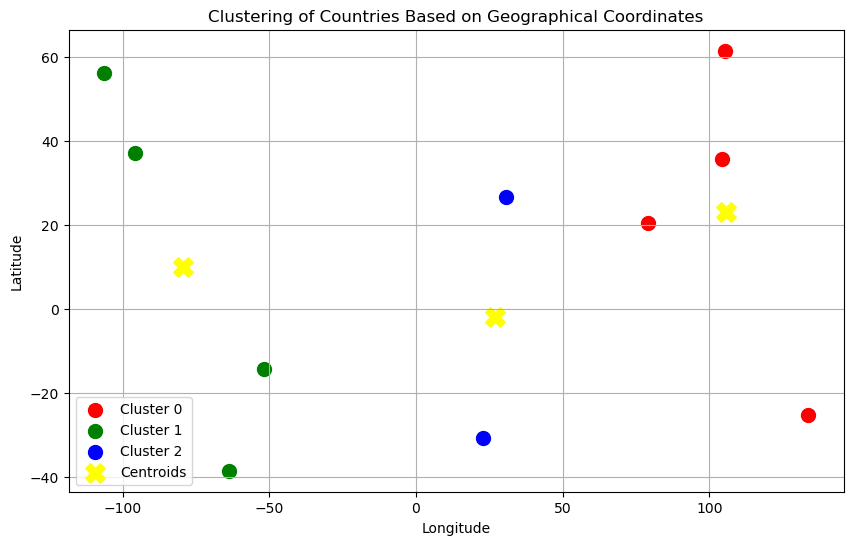

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data: Country names with their Latitude and Longitude
data = {
    'Country': ['Canada', 'United States', 'Brazil', 'Argentina', 'Russia',
                'China', 'India', 'Australia', 'South Africa', 'Egypt'],
    'Latitude': [56.1304, 37.0902, -14.2350, -38.4161, 61.5240,
                35.8617, 20.5937, -25.2744, -30.5595, 26.8206],
    'Longitude': [-106.3468, -95.7129, -51.9253, -63.6167, 105.3188,
                 104.1954, 78.9629, 133.7751, 22.9375, 30.8025]
}

# Create a DataFrame
df = pd.DataFrame(data)

print("Country Coordinates:")
print(df)

# Number of clusters
k = 3

# Features for clustering
X = df[['Latitude', 'Longitude']]

# Initialize K-Means
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model
kmeans.fit(X)

# Assign cluster labels to each country
df['Cluster'] = kmeans.labels_

print("\nClustered Countries:")
print(df)

# Define colors for clusters
colors = ['red', 'green', 'blue']

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot each cluster
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                c=colors[i], label=f'Cluster {i}', s=100)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='yellow', 
            marker='X', s=200, label='Centroids')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Countries Based on Geographical Coordinates')
plt.legend()
plt.grid(True)
plt.show()
